<a href="https://colab.research.google.com/github/dudns1234/Data_Analysis/blob/master/12_Mean_Shift_%EA%B5%B0%EC%A7%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877]


<ipython-input-1-ffdb10c4d702>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x);


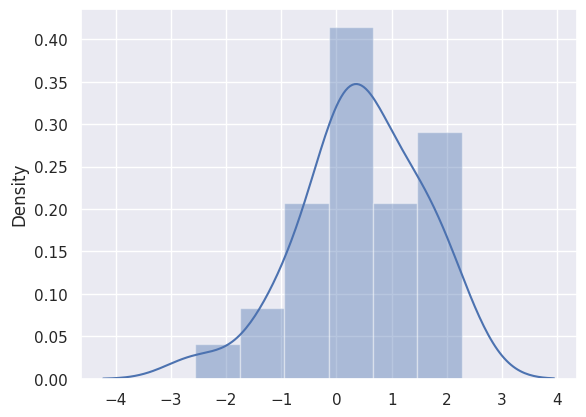

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(color_codes=True)

np.random.seed(0)
x = np.random.normal(0, 1, size=30)
print(x)
sns.distplot(x);

<ipython-input-2-5b8c24e36d36>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, rug=True)


<Axes: ylabel='Density'>

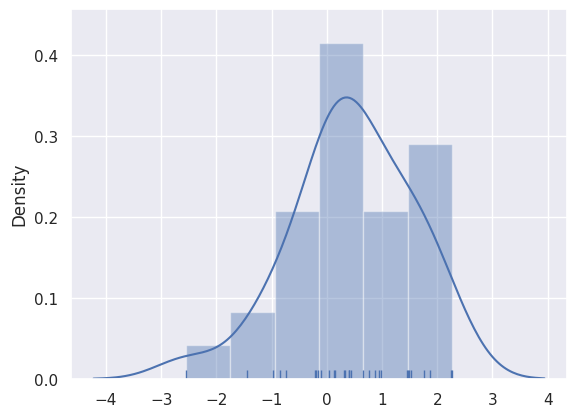

In [ ]:
sns.distplot(x, rug=True)

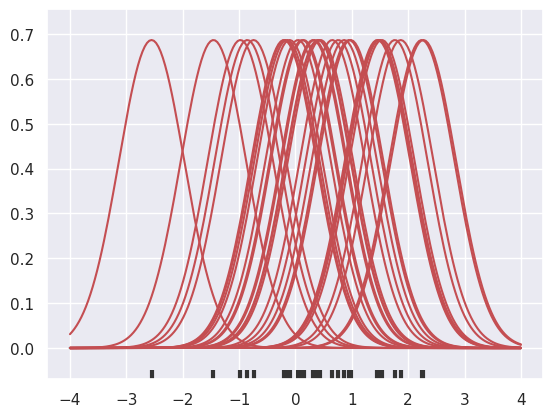

In [ ]:
from scipy import stats

#x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:
    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

In [ ]:
from scipy.integrate import trapz # 각 구간 별 y에 대한 적분

density = np.sum(kernels, axis=0)
density.shape

(200,)

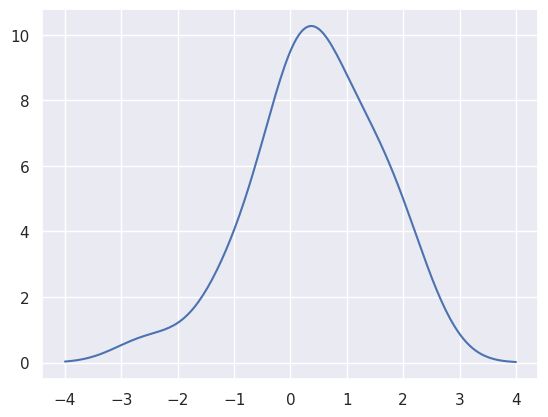

In [ ]:
plt.plot(support, density)

<ipython-input-6-e50e9a97771b>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x, shade=True)


<Axes: ylabel='Density'>

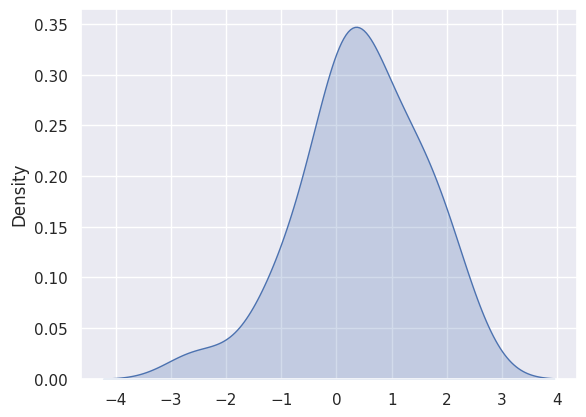

In [ ]:
# seaborn의 kdeplot()으로 kde 곡선을 바로 구할 수 있다.
sns.kdeplot(x, shade=True)

<ipython-input-7-15396fb9f318>:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(x, bw=0.2, label="bw : 0.2")
<ipython-input-7-15396fb9f318>:3: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(x, bw=2, label="bw : 2.0")


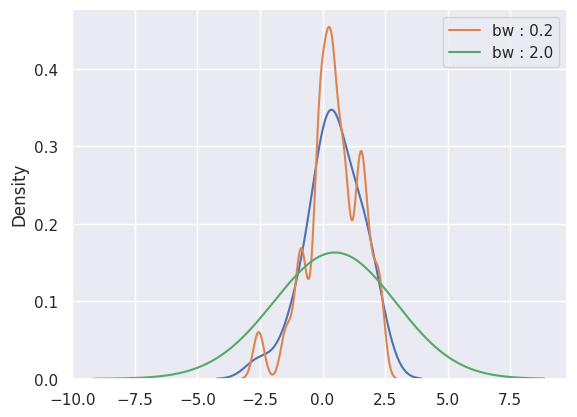

In [ ]:
sns.kdeplot(x)
sns.kdeplot(x, bw=0.2, label="bw : 0.2")
sns.kdeplot(x, bw=2, label="bw : 2.0")
plt.legend()
plt.show()

# 사이킷런의 MeanShift 사용하기

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)

In [ ]:
from sklearn.cluster import MeanShift

meanshift = MeanShift(bandwidth=0.9)
cluster_labels = meanshift.fit_predict(X)

print("클러스터의 유형 : {}".format(np.unique(cluster_labels)))

클러스터의 유형 : [0 1 2 3 4 5 6 7]


In [ ]:
import pandas as pd

sample_data_df = pd.DataFrame(
    data=X,
    columns=["x1", "x2"]
)

sample_data_df['cluster'] = cluster_labels
sample_data_df.head()

,x1,x2,cluster
0,-1.692427,3.622025,5
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,1
4,1.214861,5.364896,4


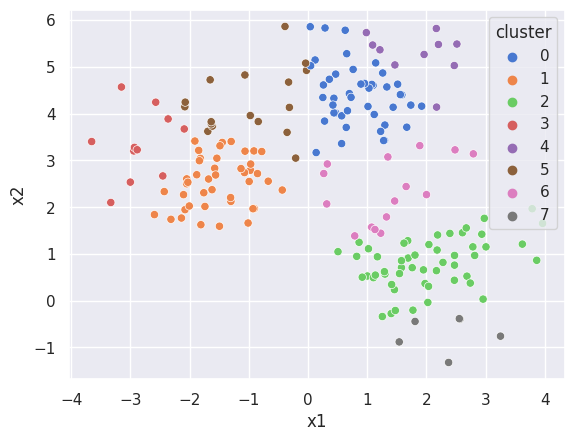

In [ ]:
sns.set_theme()
sns.scatterplot(
    x='x1',
    y='x2',
    hue='cluster',
    palette='muted',
    data=sample_data_df
)
plt.show()

In [ ]:
# bandwidth 증가
meanshift = MeanShift(bandwidth=1.0)
cluster_labels = meanshift.fit_predict(X)
print("클러스터의 유형 : {}".format(np.unique(cluster_labels)))

클러스터의 유형 : [0 1 2]


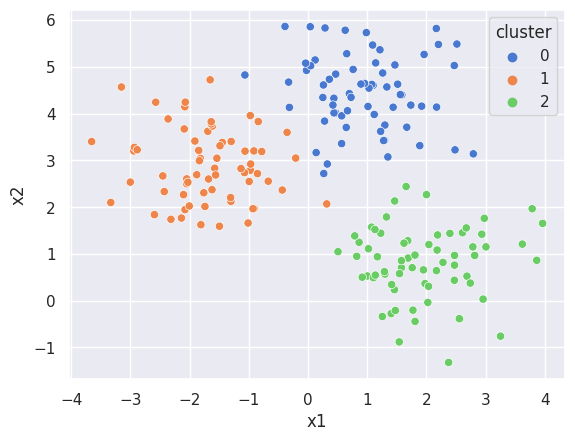

In [ ]:
sample_data_df = pd.DataFrame(
    data=X,
    columns=["x1", "x2"]
)

sample_data_df['cluster'] = cluster_labels

sns.scatterplot(
    x='x1',
    y='x2',
    hue='cluster',
    palette='muted',
    data=sample_data_df
)
plt.show()

최적의 bandwidth 구해내기

In [ ]:
from sklearn.cluster import estimate_bandwidth

best_bandwidth = estimate_bandwidth(X, quantile=0.25)
best_bandwidth

1.6889636737559222

In [ ]:
meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)

print("클러스터의 유형 : {}".format(np.unique(cluster_labels)))

클러스터의 유형 : [0 1 2]


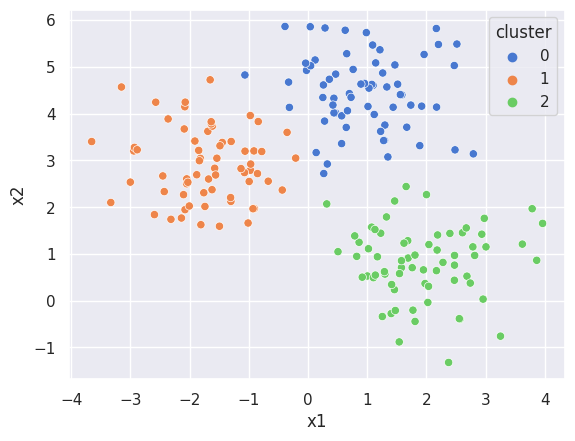

In [ ]:
sample_data_df = pd.DataFrame(
    data=X,
    columns=["x1", "x2"]
)

sample_data_df['cluster'] = cluster_labels

sns.scatterplot(
    x='x1',
    y='x2',
    hue='cluster',
    palette='muted',
    data=sample_data_df
)
plt.show()